In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

%load_ext autoreload
%autoreload 2

# Set things up

In [2]:
team_to_group = {
    'Qatar':'A',
    'Ecuador':'A',
    'Senegal':'A',
    'Netherlands':'A',
    'England':'B',
    'Iran':'B',
    'United States':'B',
    'Wales':'B',
    'Argentina':'C',
    'Saudi Arabia':'C',
    'Mexico':'C',
    'Poland':'C',
    'France':'D',
    'Australia':'D',
    'Denmark':'D',
    'Tunisia':'D',
    'Spain':'E',
    'Costa Rica':'E',
    'Germany':'E',
    'Japan':'E',
    'Belgium':'F',
    'Canada':'F',
    'Morocco':'F',
    'Croatia':'F',
    'Brazil':'G',
    'Serbia':'G',
    'Switzerland':'G',
    'Cameroon':'G',
    'Portugal':'H',
    'Ghana':'H',
    'Uruguay':'H',
    'Korea Republic':'H'
}

In [3]:
### average of the number of average goals per match in the last 3 WCs
avg_goal_per_match = 2.5

In [4]:
df = pd.read_csv('data/2022_ranking.csv')
df = utils.polish_ranking_data(df)

df['Group'] = df['Team'].map(team_to_group)

### custom modifications to the original score
df['Score_x'] = df['Score']

# pimp Qatar since it's the hosting country
df.at[ df['Team']=='Qatar', 'Score_x' ] = int(df.loc[ df['Team']=='Qatar', 'Score_x' ] * 1.1)

df.head()

,Rank,Team,Score,Group,Score_x
0,1,Brazil,1841,G,1841
1,2,Belgium,1817,F,1817
2,3,Argentina,1774,C,1774
3,4,France,1760,D,1760
4,5,England,1728,B,1728


In [5]:
df[ ~df['Group'].isnull() ].tail()

,Rank,Team,Score,Group,Score_x
42,43,Cameroon,1471,G,1471
43,44,Ecuador,1464,A,1464
49,50,Qatar,1440,A,1584
50,51,Saudi Arabia,1438,C,1438
60,61,Ghana,1393,H,1393


In [6]:
df.tail()

,Rank,Team,Score,Group,Score_x
206,207,Sri Lanka,825,NaN,825
207,208,US Virgin Islands,824,NaN,824
208,209,British Virgin Islands,809,NaN,809
209,210,Anguilla,791,NaN,791
210,211,San Marino,762,NaN,762


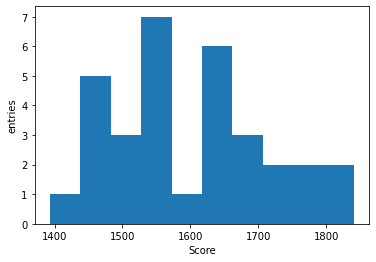

In [7]:
plt.figure()

plt.hist(df[ ~df['Group'].isnull() ]['Score']);

plt.xlabel('Score');
plt.ylabel('entries');

In [8]:
### normalization factor: average of the team-by-team difference
diffs = []
for i,row in df.iterrows():
    diffs += np.abs(df[ (df['Rank']>=row['Rank']) ]['Score'] - row['Score']).tolist()

average_diff = np.mean(diffs)
average_diff

288.212554770634

In [10]:
df[ ~df['Group'].isnull() ]

,Rank,Team,Score,Group,Score_x
0,1,Brazil,1841,G,1841
1,2,Belgium,1817,F,1817
2,3,Argentina,1774,C,1774
3,4,France,1760,D,1760
4,5,England,1728,B,1728
6,7,Spain,1715,E,1715
7,8,Netherlands,1694,A,1694
8,9,Portugal,1676,H,1676
9,10,Denmark,1666,D,1666
10,11,Germany,1650,E,1650


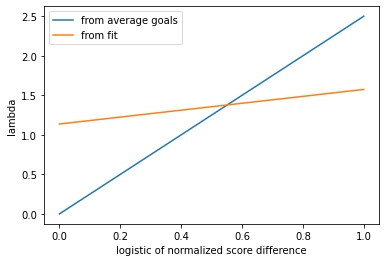

In [11]:
x = np.linspace(0,1,50)

plt.figure()

plt.plot(x, avg_goal_per_match*x, label='from average goals')
plt.plot(x, utils.logit_score_to_lambda(x,[0.436931518, 1.13720734]), label='from fit')

plt.legend(loc='best');
plt.xlabel('logistic of normalized score difference');
plt.ylabel('lambda');

# Groups stage

## Compare parametreizations

In [12]:
config = {
    'score_name': 'Score',
    'normalization_factor': average_diff,
    'n_trials': 5000,
}

In [13]:
config['to_lambdas'] = lambda x: x * avg_goal_per_match
outputs = []
for n,g in df.groupby('Group'):
    o,_ = utils.simulate_group(g,n,**config)
    outputs += o
    
df_ave = utils.extract(outputs)
df_ave.head()

********* GROUP A ***********
Senegal - Netherlands --> Netherlands (26.8% / 25.5% / 47.7%)
Ecuador - Netherlands --> Netherlands (16.2% / 23.6% / 60.2%)
Qatar - Netherlands --> Netherlands (15.5% / 23.3% / 61.2%)
Ecuador - Senegal --> Senegal (26.0% / 24.6% / 49.4%)
Qatar - Senegal --> Senegal (22.6% / 25.4% / 52.0%)
Qatar - Ecuador --> Ecuador (33.9% / 26.9% / 39.2%)
-- Final standing:
{'Netherlands': 5.7966, 'Senegal': 4.6004, 'Ecuador': 3.1933999999999996, 'Qatar': 2.9152, 'group': 'A'}
********* GROUP B ***********
United States - England --> England (26.2% / 25.7% / 48.1%)
Wales - England --> England (20.8% / 24.1% / 55.1%)
Iran - England --> England (21.4% / 24.5% / 54.0%)
Wales - United States --> United States (30.4% / 27.5% / 42.1%)
Iran - United States --> United States (29.6% / 27.2% / 43.2%)
Iran - Wales --> Wales (35.4% / 27.5% / 37.0%)
-- Final standing:
{'England': 5.4606, 'United States': 4.151000000000001, 'Wales': 3.4361999999999995, 'Iran': 3.3868, 'group': 'B'}
***

,teams,normalized_score_diff,goals,probabilities,group,p_best_wins,p_worst_wins,p_draw
0,"[Senegal, Netherlands]",0.381663,"[[1, 0], [2, 3], [1, 1], [2, 1], [1, 1], [0, 2...","[0.2678, 0.2554, 0.4768]",A,0.4768,0.2678,0.2554
1,"[Ecuador, Netherlands]",0.798022,"[[2, 2], [0, 1], [2, 1], [0, 2], [1, 3], [1, 2...","[0.162, 0.2362, 0.6018]",A,0.6018,0.1620,0.2362
2,"[Qatar, Netherlands]",0.881294,"[[4, 0], [1, 1], [1, 2], [0, 1], [2, 2], [1, 2...","[0.1548, 0.2332, 0.612]",A,0.6120,0.1548,0.2332
3,"[Ecuador, Senegal]",0.416359,"[[0, 4], [1, 2], [1, 2], [0, 1], [0, 4], [1, 2...","[0.26, 0.2464, 0.4936]",A,0.4936,0.2600,0.2464
4,"[Qatar, Senegal]",0.499631,"[[0, 1], [0, 1], [1, 2], [3, 2], [0, 1], [2, 1...","[0.226, 0.2538, 0.5202]",A,0.5202,0.2260,0.2538


In [15]:
config['to_lambdas'] = lambda x: utils.logit_score_to_lambda(x, [0.436931518, 1.13720734])
outputs = []
for n,g in df.groupby('Group'):
    o,_ = utils.simulate_group(g,n,**config)
    outputs += o
    
df_fit = utils.extract(outputs)
df_fit.head()

********* GROUP A ***********
Senegal - Netherlands --> Netherlands (34.7% / 26.3% / 39.0%)
Ecuador - Netherlands --> Netherlands (32.5% / 26.3% / 41.2%)
Qatar - Netherlands --> Netherlands (32.7% / 24.8% / 42.5%)
Ecuador - Senegal --> Senegal (35.0% / 25.7% / 39.3%)
Qatar - Senegal --> Senegal (34.3% / 25.8% / 39.9%)
Qatar - Ecuador --> Qatar (36.9% / 26.9% / 36.2%)
-- Final standing:
{'Netherlands': 4.4568, 'Senegal': 4.1942, 'Ecuador': 3.8998000000000004, 'Qatar': 3.8920000000000003, 'group': 'A'}
********* GROUP B ***********
United States - England --> England (36.3% / 25.3% / 38.5%)
Wales - England --> England (33.9% / 25.6% / 40.5%)
Iran - England --> England (33.8% / 27.0% / 39.2%)
Wales - United States --> United States (35.8% / 26.0% / 38.2%)
Iran - United States --> United States (36.0% / 26.0% / 38.0%)
Iran - Wales --> Wales (36.8% / 25.5% / 37.7%)
-- Final standing:
{'England': 4.3248, 'United States': 4.1476, 'Wales': 3.991, 'Iran': 3.9832, 'group': 'B'}
********* GROUP C

,teams,normalized_score_diff,goals,probabilities,group,p_best_wins,p_worst_wins,p_draw
0,"[Senegal, Netherlands]",0.381663,"[[0, 1], [2, 4], [1, 0], [1, 2], [1, 0], [3, 1...","[0.3466, 0.263, 0.3904]",A,0.3904,0.3466,0.2630
1,"[Ecuador, Netherlands]",0.798022,"[[1, 2], [2, 2], [0, 0], [2, 0], [0, 4], [1, 2...","[0.3254, 0.2626, 0.412]",A,0.4120,0.3254,0.2626
2,"[Qatar, Netherlands]",0.881294,"[[3, 0], [2, 1], [0, 2], [2, 1], [2, 3], [1, 1...","[0.3268, 0.2478, 0.4254]",A,0.4254,0.3268,0.2478
3,"[Ecuador, Senegal]",0.416359,"[[2, 3], [1, 1], [1, 0], [2, 0], [0, 0], [2, 1...","[0.3502, 0.2566, 0.3932]",A,0.3932,0.3502,0.2566
4,"[Qatar, Senegal]",0.499631,"[[2, 0], [2, 2], [2, 2], [1, 0], [1, 1], [4, 2...","[0.3428, 0.2582, 0.399]",A,0.3990,0.3428,0.2582


In [16]:
dfs = {}
dfs['fit'] = df_fit
dfs['ave'] = df_ave

In [17]:
def prob_to_outcome(probs, mapping={0:1, 1:'x', 2:2}):
    
    idx = np.argmax(probs)
    
    return mapping.get(idx)

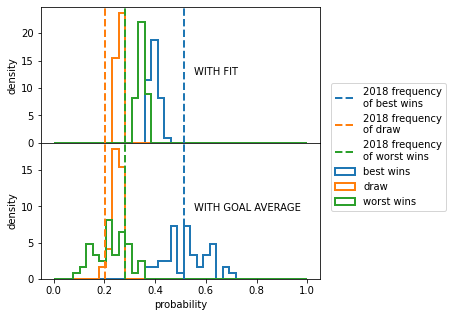

In [24]:
opt = {
    'bins': np.linspace(0,1,40),
    'histtype':'step',
    'lw':2,
    'density': True
}

color_map = {
    'best': 'tab:blue',
    'draw': 'tab:orange',
    'worst': 'tab:green'
}

from_2018_data = {
    'best': 0.515625,
    'worst': 0.281250,
    'draw': 0.203125,
}

f,axs = plt.subplots(nrows=2, figsize=(5,5))
f.subplots_adjust(hspace=0)

i = 0
for k,data in dfs.items():
    
    for j,v in enumerate(['best','draw','worst']):
        
        var = f'p_{v}_wins'
        label = f'{v} wins'
        if v == 'draw':
            var = 'p_draw'
            label = 'draw'
        axs[i].hist(data[var], label=label, color=color_map[v], **opt)
        axs[i].axvline(from_2018_data[v], color=color_map[v], ls='--', lw=2, label=f'2018 frequency\nof {label}')
        
        if j==0:
            text = 'WITH FIT'
            if k == 'ave':
                text = 'WITH GOAL AVERAGE'
            axs[i].text(
                0.55,
                0.5,
                text,
                transform=axs[i].transAxes
            )
    
    if i==0:
        axs[i].legend(loc=(1.04, -0.5),)
    axs[i].set_ylabel('density');    
    
    i += 1
    
axs[1].set_xlabel('probability');

# Get real predictions

In [25]:
def condition_for_draw(probs):
    if (probs[1] >= .2) & (np.abs(probs[0]-probs[2])<=.1):
        return True

In [26]:
config = {
    'score_name': 'Score_x',
    'normalization_factor': average_diff,
    'n_trials': 5000,
    'to_lambdas': lambda x: x*avg_goal_per_match,
    'hack_for_draw': condition_for_draw
}

In [27]:
outputs = []
groups = []
for n,g in df.groupby('Group'):
    o,gg = utils.simulate_group(g,n,**config)
    outputs += o
    groups.append(gg)
    
ddd = utils.extract(outputs)
ddd.head()

********* GROUP A ***********
Senegal - Netherlands --> Netherlands (24.6% / 27.5% / 47.9%)
Ecuador - Netherlands --> Netherlands (16.4% / 23.0% / 60.6%)
Qatar - Netherlands --> Netherlands (25.5% / 26.4% / 48.1%)
Ecuador - Senegal --> Senegal (25.8% / 25.2% / 49.0%)
Senegal - Qatar --> Draw (36.4% / 26.9% / 36.7%)
Ecuador - Qatar --> Qatar (24.0% / 26.9% / 49.1%)
-- Final standing:
{'Netherlands': 5.465400000000001, 'Qatar': 4.1402, 'Senegal': 4.0973999999999995, 'Ecuador': 2.7378, 'group': 'A'}
********* GROUP B ***********
United States - England --> England (25.5% / 26.9% / 47.6%)
Wales - England --> England (21.8% / 24.6% / 53.6%)
Iran - England --> England (21.4% / 26.2% / 52.4%)
Wales - United States --> United States (30.4% / 26.7% / 42.9%)
Iran - United States --> United States (29.4% / 27.0% / 43.6%)
Iran - Wales --> Draw (35.2% / 26.1% / 38.7%)
-- Final standing:
{'England': 5.385400000000001, 'United States': 4.1672, 'Wales': 3.4997999999999996, 'Iran': 3.373, 'group': 'B'}

,teams,normalized_score_diff,goals,probabilities,group,p_best_wins,p_worst_wins,p_draw
0,"[Senegal, Netherlands]",0.381663,"[[1, 0], [2, 0], [0, 1], [3, 1], [1, 2], [1, 1...","[0.2462, 0.2746, 0.4792]",A,0.4792,0.2462,0.2746
1,"[Ecuador, Netherlands]",0.798022,"[[0, 0], [1, 2], [1, 1], [0, 0], [1, 3], [0, 0...","[0.164, 0.2304, 0.6056]",A,0.6056,0.1640,0.2304
2,"[Qatar, Netherlands]",0.381663,"[[1, 2], [0, 2], [1, 2], [0, 3], [2, 0], [0, 0...","[0.2552, 0.2642, 0.4806]",A,0.4806,0.2552,0.2642
3,"[Ecuador, Senegal]",0.416359,"[[0, 0], [0, 2], [1, 1], [1, 3], [0, 1], [0, 0...","[0.2576, 0.2524, 0.49]",A,0.4900,0.2576,0.2524
4,"[Senegal, Qatar]",0.000000,"[[1, 2], [0, 2], [2, 0], [1, 2], [1, 0], [2, 0...","[0.3644, 0.2686, 0.367]",A,0.3670,0.3644,0.2686


In [28]:
def dump_row(data):
    
    row = """| {0} | {1} | {2:.1f}% | {3:.1f}% | {4:.1f}% |""".format(
        data['group'],
        '-'.join(data['teams']),
        100*data['p_worst_wins'],
        100*data['p_draw'],
        100*data['p_best_wins']
    )
    
    print(row)

In [30]:
def dump_table(data):

    header = """| group | match | P(TEAM1 WINS) | P(DRAW) | P(TEAM2 WINS) |"""
    
    print(header)
    print('-'*len(header))
    for i,row in ddd.iterrows():
        dump_row(row)
        
    return

In [31]:
dump_table(ddd)

| group | match | P(TEAM1 WINS) | P(DRAW) | P(TEAM2 WINS) |
-----------------------------------------------------------
| A | Senegal-Netherlands | 24.6% | 27.5% | 47.9% |
| A | Ecuador-Netherlands | 16.4% | 23.0% | 60.6% |
| A | Qatar-Netherlands | 25.5% | 26.4% | 48.1% |
| A | Ecuador-Senegal | 25.8% | 25.2% | 49.0% |
| A | Senegal-Qatar | 36.4% | 26.9% | 36.7% |
| A | Ecuador-Qatar | 24.0% | 26.9% | 49.1% |
| B | United States-England | 25.5% | 26.9% | 47.6% |
| B | Wales-England | 21.8% | 24.6% | 53.6% |
| B | Iran-England | 21.4% | 26.2% | 52.4% |
| B | Wales-United States | 30.4% | 26.7% | 42.9% |
| B | Iran-United States | 29.4% | 27.0% | 43.6% |
| B | Iran-Wales | 35.2% | 26.1% | 38.7% |
| C | Mexico-Argentina | 25.1% | 25.9% | 48.9% |
| C | Poland-Argentina | 17.3% | 23.4% | 59.3% |
| C | Saudi Arabia-Argentina | 10.7% | 20.9% | 68.4% |
| C | Poland-Mexico | 27.4% | 25.9% | 46.7% |
| C | Saudi Arabia-Mexico | 17.9% | 24.8% | 57.3% |
| C | Saudi Arabia-Poland | 25.6% | 26.0% | 

In [32]:
for g in 'ABCDEFGH':
    this_group = [i for i in groups if i['group']==g][0]
    
    print(f'********* GROUP {g} ********')
    
    print('| Team | expected points |')
    print('|------|-----------------|')
    
    for k,v in this_group.items():
        if k == 'group': continue
        row = """| {0} | {1:.2f} |""".format(k,v)
        print(row)

********* GROUP A ********
| Team | expected points |
|------|-----------------|
| Netherlands | 5.47 |
| Qatar | 4.14 |
| Senegal | 4.10 |
| Ecuador | 2.74 |
********* GROUP B ********
| Team | expected points |
|------|-----------------|
| England | 5.39 |
| United States | 4.17 |
| Wales | 3.50 |
| Iran | 3.37 |
********* GROUP C ********
| Team | expected points |
|------|-----------------|
| Argentina | 6.00 |
| Mexico | 4.64 |
| Poland | 3.55 |
| Saudi Arabia | 2.34 |
********* GROUP D ********
| Team | expected points |
|------|-----------------|
| France | 5.86 |
| Denmark | 4.82 |
| Tunisia | 2.99 |
| Australia | 2.84 |
********* GROUP E ********
| Team | expected points |
|------|-----------------|
| Spain | 5.38 |
| Germany | 4.66 |
| Japan | 3.53 |
| Costa Rica | 2.87 |
********* GROUP F ********
| Team | expected points |
|------|-----------------|
| Belgium | 6.26 |
| Croatia | 4.41 |
| Morocco | 3.41 |
| Canada | 2.45 |
********* GROUP G ********
| Team | expected points

# Play-Off

In [34]:
config = {
    'score_name': 'Score',
    'normalization_factor': average_diff,
    'n_trials': 5000,
    'to_lambdas': lambda x: x*avg_goal_per_match,
    'hack_for_draw': condition_for_draw
}

In [35]:
o = utils.simulate_match(('Denmark','France'), df, **config)
d = pd.DataFrame(o['goals'], columns=['t1','t2'])
d['t1-t2'] = d['t1'].astype(str) + '-' + d['t2'].astype(str)
o['probabilities'],d['t1-t2'].value_counts().idxmax(),d['t1'].mean(), d['t2'].mean()

(array([0.2722, 0.275 , 0.4528]), '1-1', 1.0472, 1.4298)